## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import re
import string
from collections import Counter
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('negative_new_කොටි.csv', encoding='utf-8')
df.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,15,1.485650e+18,1.485650e+18,2022-01-24 21:52:25 Sri Lanka Standard Time,1/24/2022,21:52:25,530,1.370910e+18,ukussanews,@ukussanews,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,16,1.485510e+18,1.485510e+18,2022-01-24 12:44:39 Sri Lanka Standard Time,1/24/2022,12:44:39,530,1.637974e+08,gossiplanka,Gossip Lanka News,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,17,1.485500e+18,1.485230e+18,2022-01-24 11:50:08 Sri Lanka Standard Time,1/24/2022,11:50:08,530,1.543062e+07,jingibiris,avatar state,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '7777sevenfours', 'name': 'sk...",NaN,NaN,NaN,NaN
3,18,1.485480e+18,1.485480e+18,2022-01-24 10:40:00 Sri Lanka Standard Time,1/24/2022,10:40:00,530,1.151710e+18,harigossip,Hari Gossip News,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,19,1.485450e+18,1.485320e+18,2022-01-24 08:51:15 Sri Lanka Standard Time,1/24/2022,8:51:15,530,1.312650e+18,ssirbaddana,ssirbaddana,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'UmeshMoramudali', 'name': 'U...",NaN,NaN,NaN,NaN


In [3]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2220 non-null   int64  
 1   id               2220 non-null   float64
 2   conversation_id  2220 non-null   float64
 3   created_at       2220 non-null   object 
 4   date             2220 non-null   object 
 5   time             2220 non-null   object 
 6   timezone         2220 non-null   int64  
 7   user_id          2220 non-null   float64
 8   username         2220 non-null   object 
 9   name             2220 non-null   object 
 10  place            1 non-null      object 
 11  tweet            2220 non-null   object 
 12  language         2220 non-null   object 
 13  mentions         2220 non-null   object 
 14  urls             2220 non-null   object 
 15  photos           2220 non-null   object 
 16  replies_count    2220 non-null   int64  
 17  retweets_count

In [4]:
# Get tweet from dataframe
df = df[['tweet']]
df.head()

,tweet
0,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...
1,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වන Gucci හි ප්‍රච...
2,@7777sevenfours @Athapaththu184 අඩෝ උඹේ ගේ පිට...
3,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා ...
4,@UmeshMoramudali කුමාරස්වාමි කොටි ඒජන්ත


## Preprocessing the dataset

In [5]:
# Removes duplicate and returns a copy of dataframe 
df = df.drop_duplicates()

In [6]:
# Drop Empty Rows and reset index
df = df.dropna()
df = df.reset_index()
df = df.drop('index',axis=1)

In [7]:
def count_length():
    df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split(" ")))
    
count_length()
df.head()

,tweet,word_count
0,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...,16
1,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වන Gucci හි ප්‍රච...,44
2,@7777sevenfours @Athapaththu184 අඩෝ උඹේ ගේ පිට...,9
3,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා ...,10
4,@UmeshMoramudali කුමාරස්වාමි කොටි ඒජන්ත,4


In [8]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

df.head()

,tweet,word_count
0,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...,16
1,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වන Gucci හි ප්‍රච...,44
2,@7777sevenfours @Athapaththu184 අඩෝ උඹේ ගේ පිට...,9
3,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා ...,10
4,@UmeshMoramudali කුමාරස්වාමි කොටි ඒජන්ත,4


In [9]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,tweet,word_count,clean_tweet
0,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...,16,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...
1,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වන Gucci හි ප්‍රච...,44,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වන Gucci හි ප්‍රච...
2,@7777sevenfours @Athapaththu184 අඩෝ උඹේ ගේ පිට...,9,අඩෝ උඹේ ගේ පිටිපස්සෙ කොටි ගැහුවද 🤔😂
3,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා ...,10,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා ...
4,@UmeshMoramudali කුමාරස්වාමි කොටි ඒජන්ත,4,කුමාරස්වාමි කොටි ඒජන්ත


In [10]:
# remove eng characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[!^a-zA-Z0-9#]", "")
df.head()

,tweet,word_count,clean_tweet
0,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...,16,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...
1,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වන Gucci හි ප්‍රච...,44,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වන හි ප්‍රචාරණ ව...
2,@7777sevenfours @Athapaththu184 අඩෝ උඹේ ගේ පිට...,9,අඩෝ උඹේ ගේ පිටිපස්සෙ කොටි ගැහුවද 🤔😂
3,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා ...,10,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා ...
4,@UmeshMoramudali කුමාරස්වාමි කොටි ඒජන්ත,4,කුමාරස්වාමි කොටි ඒජන්ත


In [11]:
# remove special characters
df['clean_tweet']=df['clean_tweet'].str.replace(":|/|&|$|!","")
df.head()

,tweet,word_count,clean_tweet
0,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...,16,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...
1,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වන Gucci හි ප්‍රච...,44,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වන හි ප්‍රචාරණ ව...
2,@7777sevenfours @Athapaththu184 අඩෝ උඹේ ගේ පිට...,9,අඩෝ උඹේ ගේ පිටිපස්සෙ කොටි ගැහුවද 🤔😂
3,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා ...,10,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා .
4,@UmeshMoramudali කුමාරස්වාමි කොටි ඒජන්ත,4,කුමාරස්වාමි කොටි ඒජන්ත


In [12]:
# remove extra spaces
df['clean_tweet'] = df['clean_tweet'].str.strip()
df['clean_tweet']=df['clean_tweet'].str.replace("  ","")
df.head()

,tweet,word_count,clean_tweet
0,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...,16,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...
1,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වන Gucci හි ප්‍රච...,44,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වනහි ප්‍රචාරණ ව්‍...
2,@7777sevenfours @Athapaththu184 අඩෝ උඹේ ගේ පිට...,9,අඩෝ උඹේ ගේ පිටිපස්සෙ කොටි ගැහුවද 🤔😂
3,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා ...,10,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා.
4,@UmeshMoramudali කුමාරස්වාමි කොටි ඒජන්ත,4,කුමාරස්වාමි කොටි ඒජන්ත


In [13]:
# Remove All Emojis
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
for i in range(len(df)):
    df['clean_tweet'][i] = emoji_pattern.sub(r'', df['clean_tweet'][i])

df.head()

,tweet,word_count,clean_tweet
0,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...,16,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...
1,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වන Gucci හි ප්‍රච...,44,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වනහි ප්‍රචාරණ ව්‍...
2,@7777sevenfours @Athapaththu184 අඩෝ උඹේ ගේ පිට...,9,අඩෝ උඹේ ගේ පිටිපස්සෙ කොටි ගැහුවද
3,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා ...,10,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා.
4,@UmeshMoramudali කුමාරස්වාමි කොටි ඒජන්ත,4,කුමාරස්වාමි කොටි ඒජන්ත


In [14]:
# Sinhala Tokenizer
from sinling import SinhalaTokenizer

tokenizer = SinhalaTokenizer()

def tokenization(sinhala_string):
    tokens = []
    for t in tokenizer.tokenize(sinhala_string):
        tokens.append(t)
    return tokens

tokenized_tweet = df['clean_tweet'].apply(lambda x: tokenization(x))
tokenized_tweet.head()

0    [කොටි, වැළලූ, රන්, සොයන්න, ගිය, පී.සී, ඇතුළු, ...
1    [සුඛෝපභෝගී, විලාසිතා, සන්නාමයක්, වනහි, ප්‍රචාර...
2              [අඩෝ, උඹේ, ගේ, පිටිපස්සෙ, කොටි, ගැහුවද]
3    [ලොක්කාගේ, බැංකු, ගිණුමේ, කොටි, පහකට, මෝඩ, යකා...
4                           [කුමාරස්වාමි, කොටි, ඒජන්ත]
Name: clean_tweet, dtype: object

In [15]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,tweet,word_count,clean_tweet
0,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...,16,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...
1,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වන Gucci හි ප්‍රච...,44,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වනහි ප්‍රචාරණ ව්‍...
2,@7777sevenfours @Athapaththu184 අඩෝ උඹේ ගේ පිට...,9,අඩෝ උඹේ ගේ පිටිපස්සෙ කොටි ගැහුවද
3,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා ...,10,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා .
4,@UmeshMoramudali කුමාරස්වාමි කොටි ඒජන්ත,4,කුමාරස්වාමි කොටි ඒජන්ත


In [16]:
# Test clean_tweet
df['clean_tweet'][0]

'කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට්ටු . .'

In [17]:
df.to_csv('sinhala_offensive_language(Preprocess).csv')

## Exploratory Data Analysis

In [18]:
!pip install wordcloud

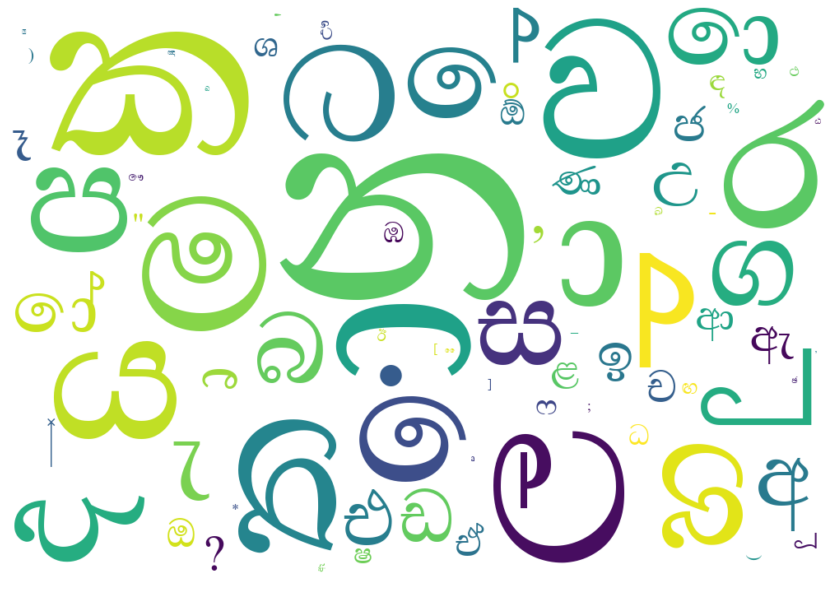

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_list = []
for i in range(len(df)):
    df_list +=df['clean_tweet'][i]
    
font = "iskpota.ttf"
dictionary=Counter(df_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10, font_path= font).generate_from_frequencies(dictionary)
# plot the WordCloud image                      
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()